<a href="https://colab.research.google.com/github/Neallaz/Machine-Learning/blob/main/MAGIC_Gamma_Telescope.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

Data are MC generated to simulate registration of high energy gamma particles in an atmospheric Cherenkov telescope:https://archive.ics.uci.edu/static/public/159/magic+gamma+telescope.zip

In [6]:
cols=["fLength","fWidth","fSize","fConc","fConc1","fAsym","fM3Long","fM3Trans","fAlpha","fDist","class"]
df=pd.read_csv("magic04.data",names=cols)
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [7]:
df["class"].unique()

array(['g', 'h'], dtype=object)

# We have only two type for class so we replace them with 0 and 1.

In [8]:
df["class"]=(df["class"]=="g").astype(int)

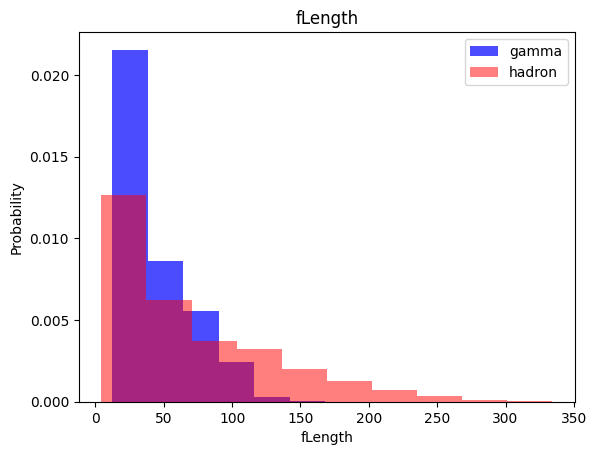

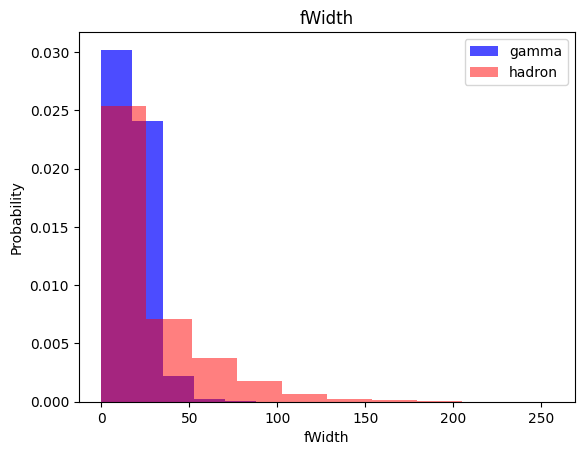

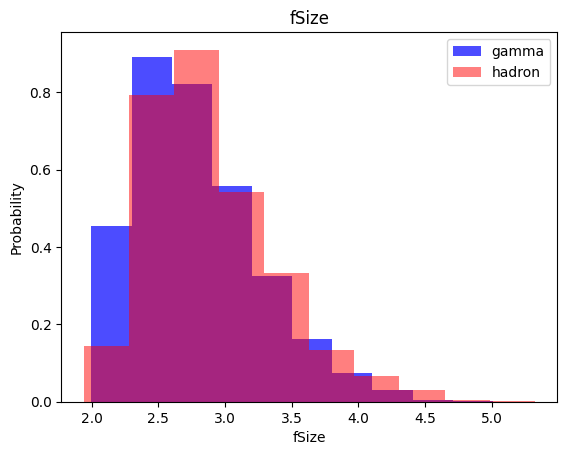

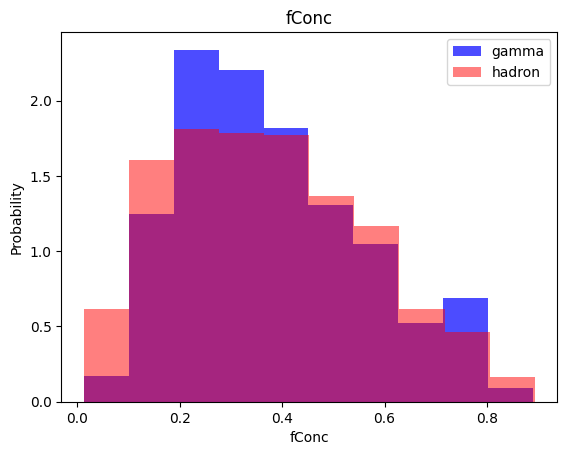

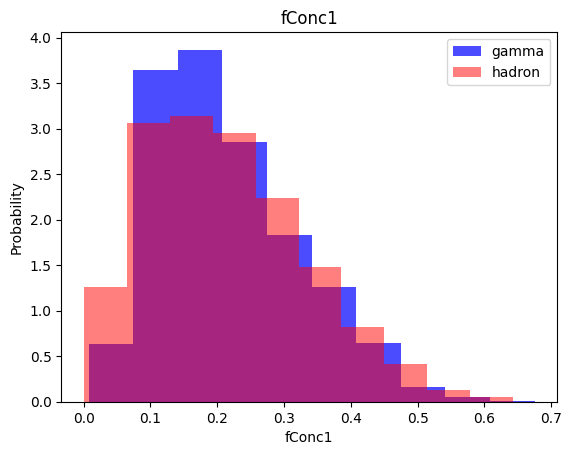

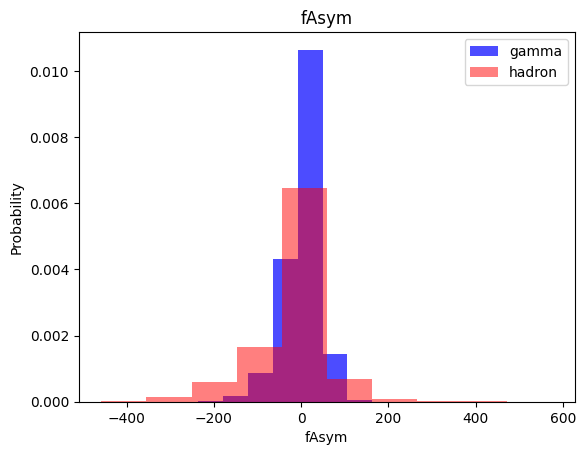

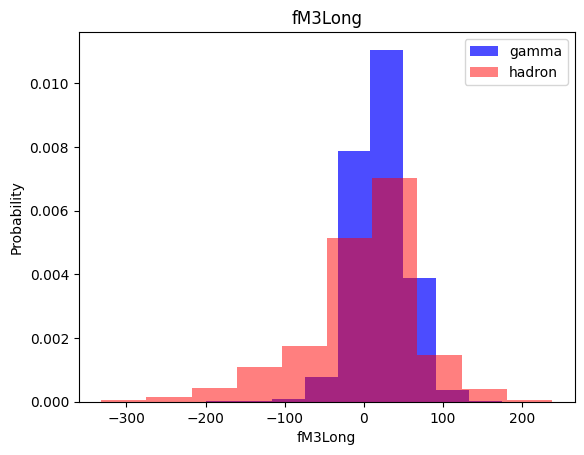

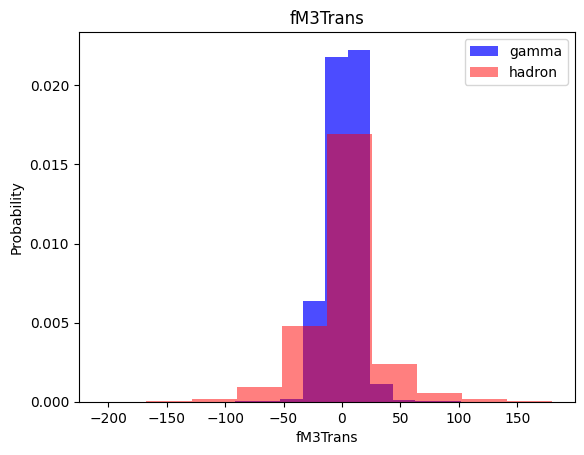

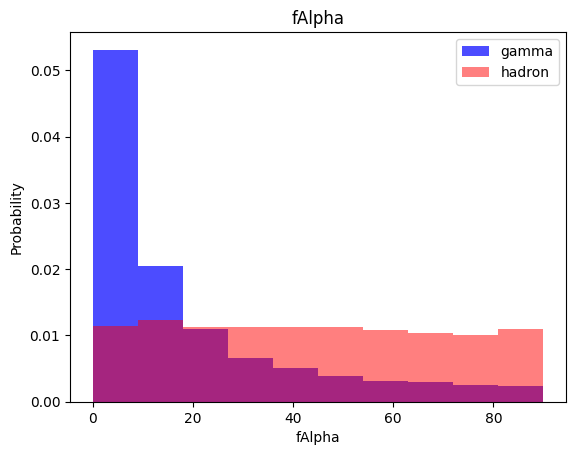

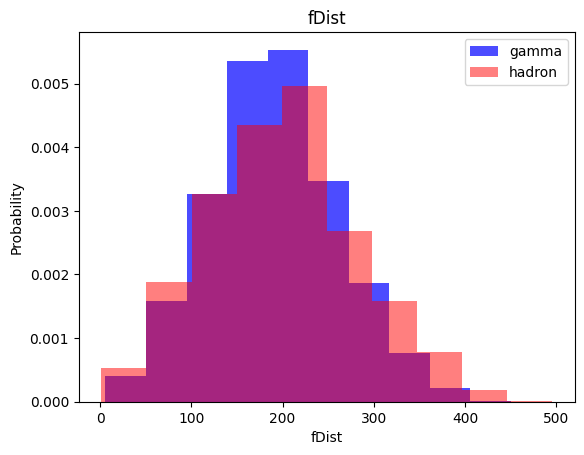

In [9]:
for label in cols[:-1]:
  plt.hist(df[df["class"]==1][label],color="blue",label="gamma",alpha=0.7,density="True")
  plt.hist(df[df["class"]==0][label],color="red",label="hadron",alpha=0.5,density="True")
  plt.title(label)
  plt.ylabel("Probability")
  plt.xlabel(label)
  plt.legend()
  plt.show()

**Train validation and Train Test**

In [10]:
train,valid,test=np.split(df.sample(frac=1),[int(0.6*len(df)),int((0.8*len(df)))])

/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [11]:
def scale_dataset(dataframe,oversample=False):
  X=dataframe[dataframe.columns[:-1]].values
  y=dataframe[dataframe.columns[-1]].values

  scaler=StandardScaler()
  X = scaler.fit_transform(X)
  # print(y)
  # print(X)
  # print(np.reshape(y,(-1,1)))
  if oversample:
    ros=RandomOverSampler()
    X,y=ros.fit_resample(X,y)
  data=np.hstack((X,np.reshape(y,(len(y),1))))
  return data,X,y


In [12]:
print(len(train[train["class"]==1]))
print(len(train[train["class"]==0]))

7374
4038


In [13]:
train,X_train,y_train=scale_dataset(train,oversample=True)
valid,X_valid,y_valid=scale_dataset(valid,oversample=False)
test,X_test,y_test=scale_dataset(test,oversample=False)


**kNN**

In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [15]:
knn_model=KNeighborsClassifier(n_neighbors=1)
knn_model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [16]:
y_predict=knn_model.predict(X_test)

In [17]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.76      0.68      0.71      1289
           1       0.84      0.89      0.86      2515

    accuracy                           0.82      3804
   macro avg       0.80      0.78      0.79      3804
weighted avg       0.81      0.82      0.81      3804



**Naive Bayer**

In [18]:
from sklearn.naive_bayes import GaussianNB

In [19]:
nb_model=GaussianNB()
nb_model=nb_model.fit(X_train,y_train)

In [20]:
y_pred = nb_model.predict(X_test)
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.76      0.68      0.71      1289
           1       0.84      0.89      0.86      2515

    accuracy                           0.82      3804
   macro avg       0.80      0.78      0.79      3804
weighted avg       0.81      0.82      0.81      3804



**Logistic Regression**

In [21]:
from sklearn.linear_model import LogisticRegression

In [22]:
lg_model=LogisticRegression()
lg_model=lg_model.fit(X_train,y_train)

In [23]:
y_pred=lg_model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.67      0.72      0.69      1289
           1       0.85      0.82      0.83      2515

    accuracy                           0.78      3804
   macro avg       0.76      0.77      0.76      3804
weighted avg       0.79      0.78      0.78      3804



Support Vector Machines

In [25]:
from sklearn.svm import SVC

In [26]:
svm_model=SVC()
svm_model=svm_model.fit(X_train,y_train)

In [27]:
y_pred=svm_model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.79      0.79      1289
           1       0.89      0.90      0.90      2515

    accuracy                           0.86      3804
   macro avg       0.85      0.84      0.85      3804
weighted avg       0.86      0.86      0.86      3804

